A little notebook to help visualise the official results for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

Data automatically loaded from https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0

In [2]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# load latest cases
rki_reports = pd.read_csv(
    "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv", 
    parse_dates=['Meldedatum']
)

In [5]:
# bring into easy-to-plot shape
cases  = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlFall', aggfunc='sum'
).sort_index()
deaths = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlTodesfall', aggfunc='sum'
).sort_index()

# cumulate cases and fill in missing dates
all_dates = pd.date_range(start=cases.index[0], end=cases.index[-1])
casesc    = cases.cumsum().reindex(index=all_dates).fillna(method='ffill')
deathsc   = deaths.cumsum().reindex(index=all_dates).fillna(method='ffill')

In [6]:
casesc.tail()

Bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
2020-03-17 00:00:00+00:00,2413.0,1689.0,449.0,171.0,69.0,497.0,572.0,83.0,660.0,3164.0,598.0,102.0,280.0,112.0,183.0,86.0
2020-03-18 00:00:00+00:00,3110.0,2227.0,593.0,207.0,79.0,621.0,781.0,126.0,877.0,3541.0,754.0,127.0,393.0,150.0,232.0,115.0
2020-03-19 00:00:00+00:00,3574.0,2730.0,773.0,250.0,120.0,807.0,973.0,160.0,1064.0,3544.0,888.0,157.0,532.0,189.0,284.0,153.0
2020-03-20 00:00:00+00:00,3795.0,3223.0,932.0,272.0,142.0,869.0,1162.0,172.0,1279.0,3545.0,1043.0,187.0,606.0,211.0,328.0,201.0
2020-03-21 00:00:00+00:00,3807.0,3650.0,1024.0,274.0,165.0,872.0,1175.0,172.0,1306.0,3545.0,1053.0,187.0,606.0,211.0,347.0,216.0


In [7]:
# choose a random list of federal states to plot
plot_de = [
    'Hamburg',
    'Bremen',
    'Berlin',
    'Bayern',
    'Nordrhein-Westfalen',
]

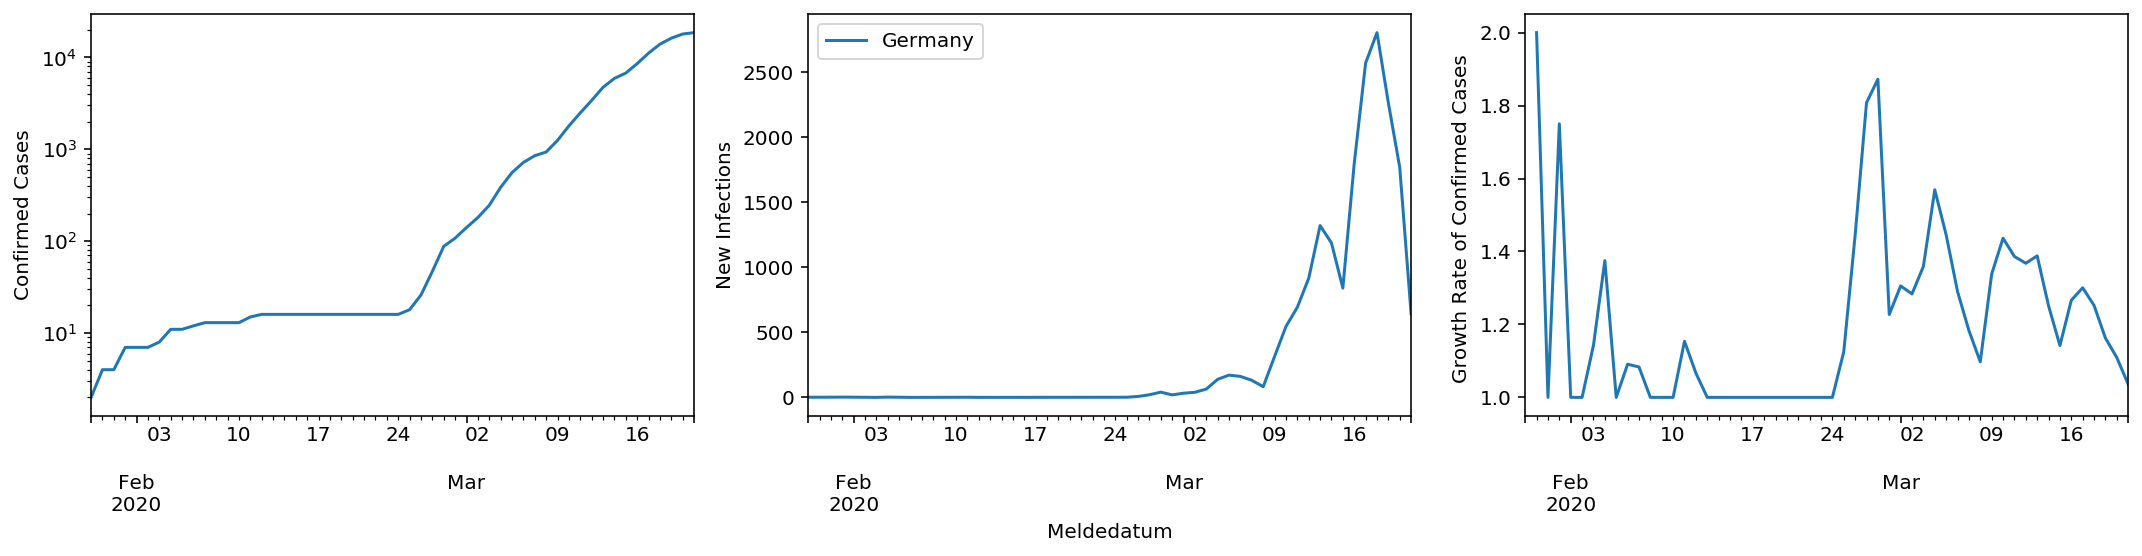

In [8]:
plt.close(1)
fig1, ax1 = plt.subplots(ncols=3, figsize=(15,4), sharex=True, num=1)

germany  = cases.sum(axis=1)
germanyc = casesc.sum(axis=1)

germanyc.plot(ax=ax1[0], logy=True)
germany.plot(ax=ax1[1])
(germanyc / germanyc.shift(1)).plot(ax=ax1[2])

ax1[0].set_ylabel('Confirmed Cases')
ax1[1].set_ylabel('New Infections')
ax1[2].set_ylabel('Growth Rate of Confirmed Cases ')

ax1[1].legend(['Germany'])
fig1.tight_layout()

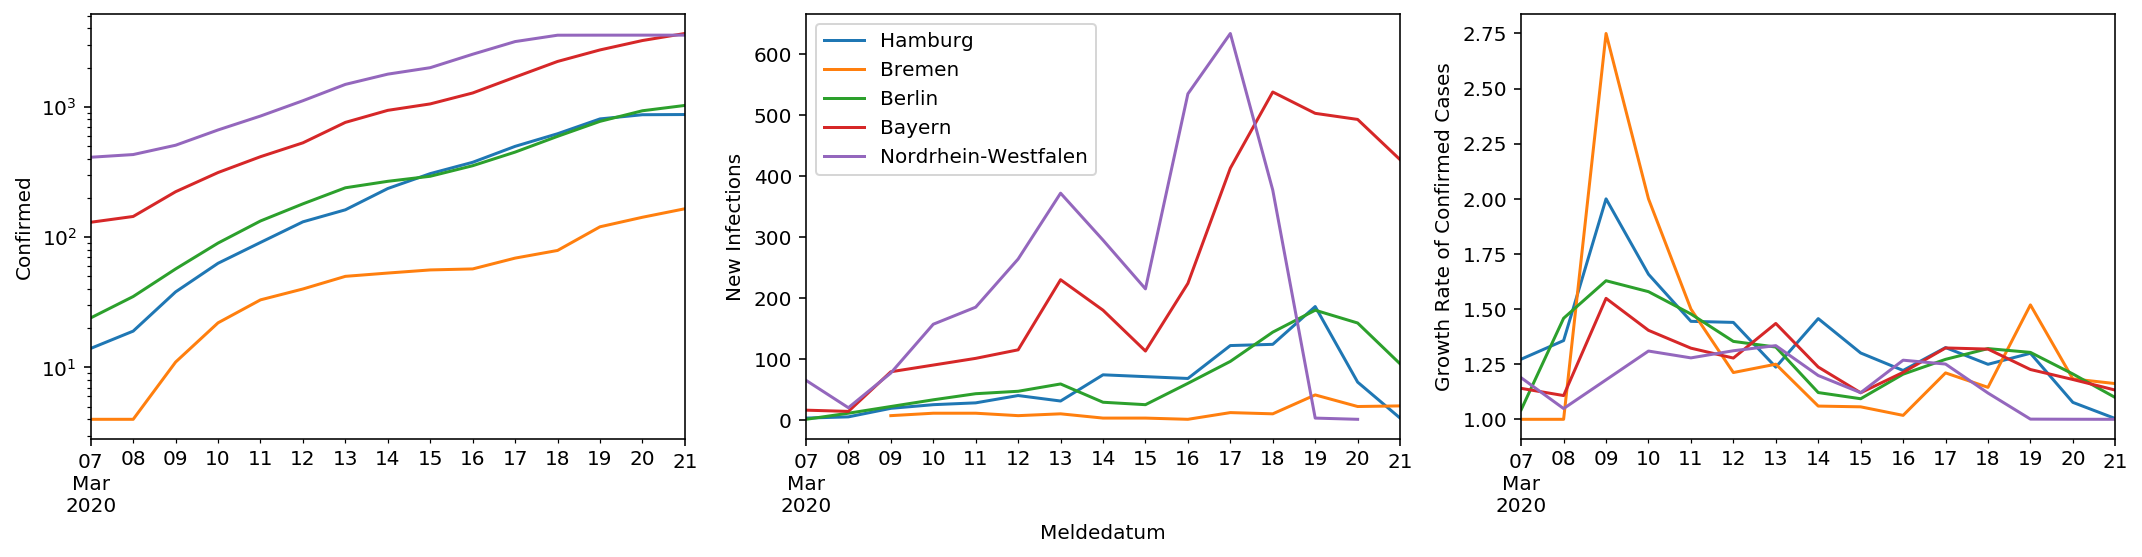

In [9]:
plt.close(2)
fig2, ax2 = plt.subplots(ncols=3, figsize=(15,4), sharex=True, num=2)

# show only last 2 weeks for better visibility
start = cases.index[-1].date() - pd.Timedelta('14d')
end   = cases.index[-1].date()

casesc.loc[start:end, plot_de].plot(ax=ax2[0], logy=True, legend=False)
cases.loc[start:end, plot_de].plot(ax=ax2[1], legend=False)
(casesc / casesc.shift(1)).loc[start:end, plot_de].plot(ax=ax2[2], legend=False)

ax2[0].set_ylabel('Confirmed')
ax2[1].set_ylabel('New Infections')
ax2[2].set_ylabel('Growth Rate of Confirmed Cases')

ax2[1].legend()

fig2.tight_layout()

In [10]:
# save the above figure
#fig2.savefig('covid-19_timeseries_de.png')